# Dates and Times in Python

In [10]:
from datetime import datetime
datetime(year = 2025, month = 4, day = 17)

datetime.datetime(2025, 4, 17, 0, 0)

In [11]:
from dateutil import parser
date = parser.parse("2025-04-17")
print(date)

2025-04-17 00:00:00


In [12]:
date.strftime('%A')

'Thursday'

In [15]:
date.strptime("2025-04-17", "%Y-%m-%d")

datetime.datetime(2025, 4, 17, 0, 0)

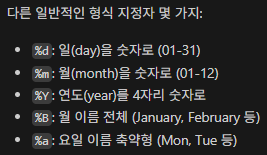

## In Numpy

In [ ]:
import numpy as np

date = np.array('2001-04-17', dtype = np.datetime64) # 64비트 정수형 변환
date

array('2001-04-17', dtype='datetime64[D]')

In [ ]:
date + np.arange(12) # 정수 연산

array(['2001-04-17', '2001-04-18', '2001-04-19', '2001-04-20',
       '2001-04-21', '2001-04-22', '2001-04-23', '2001-04-24',
       '2001-04-25', '2001-04-26', '2001-04-27', '2001-04-28'],
      dtype='datetime64[D]')

In [ ]:
print(np.datetime64('2025-04-17'))
print(np.datetime64('2025-04-17T12:00:00'))# 날짜와 시간
print(np.datetime64('2025-04-17T12:00:00', 'ns')) # ns 단위로 자르기

2025-04-17
2025-04-17T12:00:00
2025-04-17T12:00:00.000000000


## In Pandas

In [18]:
import pandas as pd
date = pd.to_datetime("2025-04-17")
date

Timestamp('2025-04-17 00:00:00')

In [19]:
date.strftime('%A')

'Thursday'

In [23]:
date + pd.to_timedelta(np.arange(12), 'D') # Day로 12일 더하기

DatetimeIndex(['2025-04-17', '2025-04-18', '2025-04-19', '2025-04-20',
               '2025-04-21', '2025-04-22', '2025-04-23', '2025-04-24',
               '2025-04-25', '2025-04-26', '2025-04-27', '2025-04-28'],
              dtype='datetime64[ns]', freq=None)

# Pandas Time Series

In [24]:
index = pd.DatetimeIndex(['2014-07-14', '2014-08-14', '2015-07-14', '2015-08-14'])
data = pd.Series([0, 1, 2, 3], index = index)
data

2014-07-14    0
2014-08-14    1
2015-07-14    2
2015-08-14    3
dtype: int64

In [26]:
data['2015'] # 연도를 인덱스로 바로 활용

2015-07-14    2
2015-08-14    3
dtype: int64

## Pandas Time Series 자료 구조

`Timestamp` `DatetimeIndex` `PeriodIndex` `TimedeltaIndex`

In [33]:
dates = pd.to_datetime([datetime(2025, 4, 17), '17th of April, 2001', '2020-03-02', '20201205'])
dates

DatetimeIndex(['2025-04-17', '2001-04-17', '2020-03-02', '2020-12-05'], dtype='datetime64[ns]', freq=None)

In [34]:
dates.to_period('D')

PeriodIndex(['2025-04-17', '2001-04-17', '2020-03-02', '2020-12-05'], dtype='period[D]')

In [37]:
dates[0]

Timestamp('2025-04-17 00:00:00')

In [40]:
print(f"날짜 인덱스 : {dates}")
print(f"첫번째 날짜 : {dates[0]}")
print(f"dates - dates[0] : {dates - dates[0]}") # dates[0]을 기준으로 날짜 차이 계산

날짜 인덱스 : DatetimeIndex(['2025-04-17', '2001-04-17', '2020-03-02', '2020-12-05'], dtype='datetime64[ns]', freq=None)
첫번째 날짜 : 2025-04-17 00:00:00
dates - dates[0] : TimedeltaIndex(['0 days', '-8766 days', '-1872 days', '-1594 days'], dtype='timedelta64[ns]', freq=None)


## Regular Sequences

In [ ]:
pd.date_range('2025-04-17', '2025-04-30') # default : [D], 날짜 범위 생성

DatetimeIndex(['2025-04-17', '2025-04-18', '2025-04-19', '2025-04-20',
               '2025-04-21', '2025-04-22', '2025-04-23', '2025-04-24',
               '2025-04-25', '2025-04-26', '2025-04-27', '2025-04-28',
               '2025-04-29', '2025-04-30'],
              dtype='datetime64[ns]', freq='D')

In [43]:
pd.date_range('2025-04-17', periods = 12) # 12일 생성

DatetimeIndex(['2025-04-17', '2025-04-18', '2025-04-19', '2025-04-20',
               '2025-04-21', '2025-04-22', '2025-04-23', '2025-04-24',
               '2025-04-25', '2025-04-26', '2025-04-27', '2025-04-28'],
              dtype='datetime64[ns]', freq='D')

In [45]:
pd.date_range('2025-04-17', freq = 'H', periods = 12) # H : hour 기준으로 12개 생성

C:\Users\Noh\AppData\Local\Temp\ipykernel_6708\2203586597.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range('2025-04-17', freq = 'H', periods = 12) # H : hour 기준으로 12개 생성


DatetimeIndex(['2025-04-17 00:00:00', '2025-04-17 01:00:00',
               '2025-04-17 02:00:00', '2025-04-17 03:00:00',
               '2025-04-17 04:00:00', '2025-04-17 05:00:00',
               '2025-04-17 06:00:00', '2025-04-17 07:00:00',
               '2025-04-17 08:00:00', '2025-04-17 09:00:00',
               '2025-04-17 10:00:00', '2025-04-17 11:00:00'],
              dtype='datetime64[ns]', freq='h')

# Frequencies and Offsets

`D` : Calendar Day
`B` : Business Day

`W` : Weekly

`M` : Month end

...

# Resampling, Shifting, Windowing

In [1]:
from pandas_datareader import data

goog = data.DataReader('^GSPC', start = '2018', end = '2022', data_source = 'yahoo')
goog.head

AttributeError: 'NoneType' object has no attribute 'group'

resample : group by랑 비슷하게 (aggregation)

asfreq : 지정한 한 날 가져옴 (data selection)

## Time Shift

날짜 이동

## Rolling Windows (Windowing)

moving average (이동 평균)